# NLP Miniproject

## Introduction

The objective of this project is to gain experience with natural language processing and how to use text data to train a machine learning model to make predictions. For the miniproject, I will be working with product review text from Amazon. The reviews are for only products in the "Electronics" category. The objective is to train a model to predict the rating, ranging from 1 to 5 stars.

## Scoring

The grader uses the [R<sup>2</sup>-score](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score) for model evaluation. 

## Downloading and loading the data

The data set is available on Amazon S3 and comes as a compressed file where each line is a JSON object. 

In [2]:
import gzip
import simplejson as json

with gzip.open("data/amazon_electronics_reviews_training.json.gz", "r") as f:                                  
    data = [json.loads(line) for line in f]

In [3]:
with gzip.open("C:/Users\DELL  LATITUDE E5480\Downloads\WQU Notebook\datacourse\machine-learning\miniprojects\data/amazon_one_and_five_star_reviews.json.gz", "r") as f:
    data1 = [json.loads(line) for line in f]

In [4]:
#Has 1000 data points
len(data)

60000

The `reviewText` key is the predictor while the `ratings` key is the target variable

In [5]:
x = [data[i]['reviewText'] for i in range(len(data))]
y = [data[i]['overall'] for i in range(len(data))]

In [6]:
#Visualizing the data points
#x[:10]
#y[:10]

In [7]:
#Splitting my data into train, test, and validation 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=0)

In [8]:
#Visualising my split dataset
print("The number of data points in train data", len(x_train))
print("The number of data points in test data", len(x_test))
print("The number of data points in validation data", len(x_val))

The number of data points in train data 38400
The number of data points in test data 12000
The number of data points in validation data 9600


**Note**, the test set used by the grader is in the same format as that of `data`, a list of dictionaries. Your trained model needs to accept data in the same format. Thus, you should use `Pipeline` when constructing your model so that all necessary transformation needed are encapsulated into a single estimator object.

## Bag of words model

In [9]:
#Importing necessary libraries for pre-processing and feature extraction
from spacy.lang.en import STOP_WORDS
import spacy
from bs4 import BeautifulSoup
import string

In [10]:
#Does necessary cleaning operations
def clean(data):
    #Extracting the text(removes html tags and makes text lowercase)
    x = [BeautifulSoup(text).get_text().lower().replace("\'", "") for text in data]
    #Removing all punctuation
    x = [text.translate(str.maketrans('', '', string.punctuation)) for text in x]
    #Removing all digits
    x = [text.translate(str.maketrans('', '', string.digits)) for text in x]
    return x

In [11]:
#Cleaning the dataset
x_train = clean(x_train)
x_test = clean(x_test)
x_val = clean(x_val)

C:\Users\DELL  LATITUDE E5480\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


{5.0: 60.1171875, 3.0: 8.0078125, 1.0: 6.682291666666666, 2.0: 4.885416666666666, 4.0: 20.307291666666664}


Text(0, 0.5, 'percentage proportion')

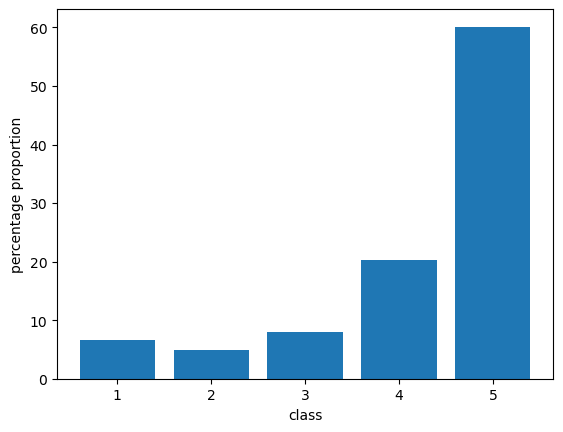

In [12]:
#Checking for the class imbalance
from collections import Counter
import matplotlib.pyplot as plt
count = Counter(y_train)
sum_ = sum(count.values())
count = {k : (v/sum_ * 100) for k, v in count.items()}
print(count)
plt.bar(count.keys(), count.values())
plt.xlabel('class')
plt.ylabel('percentage proportion')
#The class imbalance is much. How do I overcome this?.. this lead to poor performance in my model
#Try oversampling the minority class and undersampling the majority class

In [1]:
## Using fastText for feature extraction and training
from fasttext import supervised
"""fastText expects and training file (csv), a model name as input
arguments.
label_prefix refers to the prefix before label string in the dataset.
default is __label__. In our dataset, it is __class__.
There are several other parameters which can be seen in:
https://pypi.org/project/fasttext/
"""
model = supervised(x_train, 'temp', label_prefix="__class__")
results = model.test(x_test)
print(results.nexamples, results.precision, results.recall)

In [166]:
# Creating a feature vector by averaging all embeddings for all sentences
import numpy as np
# Creating a feature vector by averaging all embeddings for allsentences
def embedding_feats(list_of_lists):
    DIMENSION = 300
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this = np.zeros(DIMENSION)
        count_for_this = 0
        for token in tokens:
            if token in w2v_model:
                feat_for_this += w2v_model[token]
                count_for_this +=1
        feats.append(feat_for_this/count_for_this)
    feats = np.array(feats)
    feats = np.nan_to_num(feats)
    return feats
train_vectors = embedding_feats(x_train)
test_vectors = embedding_feats(x_test)
val_vectors = embedding_feats(x_val)
print(len(train_vectors))
print(len(test_vectors))
print(len(val_vectors))

C:\Users\DELL  LATITUDE E5480\AppData\Local\Temp\ipykernel_15976\1893891536.py:15: RuntimeWarning: invalid value encountered in true_divide
  feats.append(feat_for_this/count_for_this)


38400
12000
9600


In [167]:
np.any(np.isnan(train_vectors))

False

In [168]:
x_train_dtm = train_vectors
x_test_dtm = test_vectors
x_val_dtm = val_vectors
print(x_test_dtm.shape)
print(x_train_dtm.shape)
print(x_val_dtm.shape)

(12000, 300)
(38400, 300)
(9600, 300)


In [172]:
np.any(np.isnan(x_val_dtm))

False

In [179]:
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB() #instantiate a Multinomial Naive Bayes classifier
# nb.fit(x_train_dtm, y_train)#train the mode 
# y_pred_class = nb.predict(x_test_dtm)#make class predictions for test

Text(50.722222222222214, 0.5, 'Predicted label')

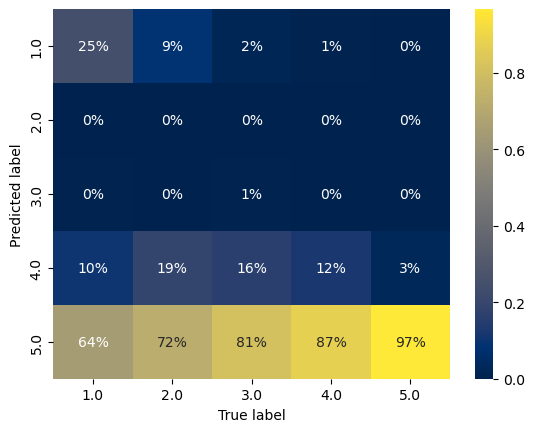

In [66]:
#Well this performed quite poorly
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_class, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [180]:
# #How am I even getting negative values
# from sklearn.metrics import accuracy_score
# nb = MultinomialNB() #instantiate a Multinomial Naive Bayes classifier
# nb.fit(x_train_dtm, y_train)#train the mode 
# y_pred_class = nb.predict(x_test_dtm)#make class predictions for test
# # Create the confusion matrix
# conf_mat = confusion_matrix(y_test, y_pred_class, normalize="true")
# # Plot the confusion matrix
# sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=set(y_train), yticklabels=set(y_train))
# plt.xlabel("True label")
# plt.ylabel("Predicted label")
# print(accuracy_score(y_test, y_pred_class))

In [174]:
#This is performing a little bit better
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(x_train_dtm, y_train)
y_pred_class = logreg.predict(x_test_dtm)
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

Accuracy:  0.33475


C:\Users\DELL  LATITUDE E5480\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [175]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(class_weight='balanced') 
classifier.fit(x_train_dtm, y_train) #fit the model with training data
y_pred_class = classifier.predict(x_test_dtm)

Accuracy:  0.5505833333333333
0.5505833333333333


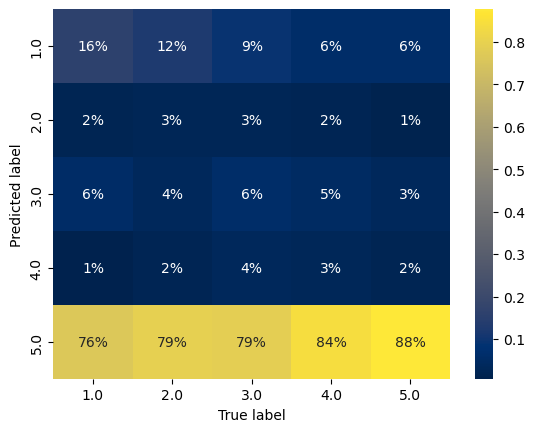

In [178]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Svms perform much better
#You can try this with much less features (100..prolly use pca to choose your 1000 features)
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_class, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel("True label")
plt.ylabel("Predicted label")
print(accuracy_score(y_test, y_pred_class))

## Try out the tf-idf vectorizer and apply the exact same process.
Prolly duplicate this notebook
Clearly, we excluded many other possibilities,
such as exploring other text classification algorithms, changing
different parameters of various classifiers, coming up with better
pre-processing methods

## Word Embeddings

In [ ]:
#Try out random forest classifier

In [183]:
#This is performing a little bit better
from sklearn.ensemble import RandomForestClassifier
logreg = RandomForestClassifier()
logreg.fit(x_train_dtm, y_train)
y_pred_class = logreg.predict(x_test_dtm)
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

Accuracy:  0.6015833333333334
